# Tagger für Musks Daten
Im Folgenden werden die beiden Datensätze von Musk und Trump getaggt. Dafür werden die Daten, die zu Musks Posts vorilegen, genauer angeschaut.

#### all_musk_posts.csv - Wie sieht die Datei aus?

In [3]:
import pandas as pd
df = pd.read_csv("all_musk_posts.csv", low_memory=False)
print(df["fullText"].iloc[5000])

@ID_AA_Carmack For Dojo, we’re betting on FP16 with floating floating point (essentially, truncating mostly zeroes), so it feels like FP32 &amp; existing software just works. We considered FP8 for a while, but everyone hated it. I even asked Twitter! For inference, int8 works great.


In [7]:
print(df.columns.tolist())

['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet', 'text_length', 'ends_with_ellipsis']


In [ ]:
df.info()

In [83]:
df.head(100).T #Die neuesten Posts scheinen kaum Metadaten gespeichert zu haben.

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,1655159652990976000,1657261624867299339,1623774484795920384,1656900119202254854,1616531874763116544,1608035930983604230,1602885009647366144,1643021267157803008,1643002171942916096,1642996528381042688,...,928675794372608000,928335114353831936,924389383792312448,924387972161552512,923576364652953600,923469108917756032,923339941957976064,922828793152229248,921575999384326144,921419557918597248
url,https://x.com/elonmusk/status/1655159652990976000,https://x.com/elonmusk/status/1657261624867299339,https://x.com/elonmusk/status/1623774484795920384,https://x.com/elonmusk/status/1656900119202254854,https://x.com/elonmusk/status/1616531874763116544,https://x.com/elonmusk/status/1608035930983604230,https://x.com/elonmusk/status/1602885009647366144,https://x.com/elonmusk/status/1643021267157803008,https://x.com/elonmusk/status/1643002171942916096,https://x.com/elonmusk/status/1642996528381042688,...,https://x.com/elonmusk/status/928675794372608000,https://x.com/elonmusk/status/928335114353831936,https://x.com/elonmusk/status/924389383792312448,https://x.com/elonmusk/status/924387972161552512,https://x.com/elonmusk/status/923576364652953600,https://x.com/elonmusk/status/923469108917756032,https://x.com/elonmusk/status/923339941957976064,https://x.com/elonmusk/status/922828793152229248,https://x.com/elonmusk/status/921575999384326144,https://x.com/elonmusk/status/921419557918597248
twitterUrl,https://twitter.com/elonmusk/status/1655159652...,https://twitter.com/elonmusk/status/1657261624...,https://twitter.com/elonmusk/status/1623774484...,https://twitter.com/elonmusk/status/1656900119...,https://twitter.com/elonmusk/status/1616531874...,https://twitter.com/elonmusk/status/1608035930...,https://twitter.com/elonmusk/status/1602885009...,https://twitter.com/elonmusk/status/1643021267...,https://twitter.com/elonmusk/status/1643002171...,https://twitter.com/elonmusk/status/1642996528...,...,https://twitter.com/elonmusk/status/9286757943...,https://twitter.com/elonmusk/status/9283351143...,https://twitter.com/elonmusk/status/9243893837...,https://twitter.com/elonmusk/status/9243879721...,https://twitter.com/elonmusk/status/9235763646...,https://twitter.com/elonmusk/status/9234691089...,https://twitter.com/elonmusk/status/9233399419...,https://twitter.com/elonmusk/status/9228287931...,https://twitter.com/elonmusk/status/9215759993...,https://twitter.com/elonmusk/status/9214195579...
fullText,RT @einarvollset: I read @paulg’s “How to Mak...,https://t.co/Zjn6r15lrR,RT @BillyM2k: dude bookmarks are an awesome tw...,Event Horizon Balance Beam,RT @BillyM2k: @elonmusk oh that’s actually pre...,RT @SpaceX: Watch Falcon 9 launch 54 Starlink ...,RT @Tesla: Holiday Update rolling out now 🎅,@davidmweissman The Internetz,https://t.co/Of6pyGjmHp,@BillyM2k What a tool,...,"""If one day, my words are against science, cho...",Atatürk Anıtkabir https://t.co/al3wt0njr6,@uncover007 500 ft so far. Should be 2 miles l...,Picture of The Boring Company LA tunnel taken ...,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",Campfire on the Gigafactory roof https://t.co/...,Just feed it The Godfather movies as input. Wh...,@verge Groan,@jamesharvey1991 It won't even need to ask you...,@APTA_info @baltimoresun Not ready to do a pro...
retweetCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49919.0,34752.0,207.0,8834.0,1193.0,749.0,5190.0,307.0,29.0,370.0
replyCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104722.0,104823.0,2128.0,58882.0,11563.0,8785.0,20573.0,4241.0,368.0,4000.0
quoteCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viewCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
createdAt,2023-05-07 10:36:27+00:00,2023-05-13 05:48:56+00:00,2023-02-09 20:03:00+00:00,2023-05-12 05:52:26+00:00,2023-01-20 20:23:27+00:00,2022-12-28 09:4

In [17]:
df.shape

(54461, 24)

#### ...mit den Daten vertraut machen...

In [29]:
# Wie viele Posts enthalten eine Angabe zu den Likes?
count_with_like = df["likeCount"].notna().sum()
print(f"Anzahl der Posts mit likeCount: {count_with_like}")

Anzahl der Posts mit likeCount: 54371


In [30]:
count_without_like = df["likeCount"].isna().sum()
print(f"Anzahl der Posts ohne likeCount: {count_without_like}")

Anzahl der Posts ohne likeCount: 90


In [34]:
# Wie viele Posts enthalten eine Angabe zu den Retweets?
count_with_retweet = df["retweetCount"].notna().sum()
print(f"Anzahl der Posts mit retweetCount: {count_with_like}")

Anzahl der Posts mit retweetCount: 54371


In [35]:
count_without_retweet = df["retweetCount"].isna().sum()
print(f"Anzahl der Posts ohne retweetCount: {count_without_retweet}")

Anzahl der Posts ohne retweetCount: 90


In [37]:
# Wie viele Posts enthalten eine Angabe zu den Replies?
count_with_reply = df["replyCount"].notna().sum()
print(f"Anzahl der Posts mit replyCount: {count_with_reply}")

Anzahl der Posts mit replyCount: 53659


In [38]:
count_without_reply = df["replyCount"].isna().sum()
print(f"Anzahl der Posts ohne replyCount: {count_without_reply}")

Anzahl der Posts ohne replyCount: 802


In [12]:
# Anzahl leerer Strings und Nan-Werte:
num_empty_str = (df["fullText"] == "").sum()
num_nan = df["fullText"].isna().sum()
print("Leere Strings:", num_empty_str)
print("NaN-Werte:", num_nan)

Leere Strings: 0
NaN-Werte: 0


In [40]:
df.fullText[2] #der Text ist abgeschnitten - kommt das öfter vor?

'RT @BillyM2k: dude bookmarks are an awesome twitter feature, especially when preparing for a twitter spaces where you want to talk about pa…'

In [47]:
df.fullText[84] #dieser ist vollständig; 
#abgeschnitten sind wohl nur neuere Posts, die mehr als eine Zeile beinhalten.

'@ben4appel 🤣'

In [1]:
# Wie viele unvollständige Posts gibt es, die mit … enden?
import pandas as pd
df = pd.read_csv("all_musk_posts.csv", low_memory=False)
mask = df["fullText"].str.endswith("…")
count_ellipsis = mask.sum()
print(f"Anzahl der Posts, deren fullText mit '…' endet: {count_ellipsis}")

Anzahl der Posts, deren fullText mit '…' endet: 845


In [60]:
df.shape

(54461, 24)

Es sind offenbar nicht so viele Posts, die abgeschnitten wurden, sonst wäre das Korpus nicht verwendbar.

In [5]:
mask.head(60) # Posts, die mit '...' enden, ja oder nein:

0      True
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: fullText, dtype: bool

In [68]:
df.fullText[0]

'RT @einarvollset: I read @paulg’s  “How to Make Wealth” in Hackers &amp; Painters when I was in my mid twenties. It’s one of those pieces that…'

In [72]:
df.fullText[18]

"RT @SenBillNelson: It was great to see @SpaceX take a big step forward with Starship's hot fire test! \n\nStarship is integral to @NASA’s Moo…"

In [76]:
df.fullText[37]

'You can almost hear that snap of the rubber glove before chess match cavity searches …'

In [8]:
#Character abgleichen über die Länge
df["text_length"] = df["fullText"].str.len()
print(len(df.fullText[37]))

86


In [9]:
df[df["fullText"].str.endswith("…")]["text_length"].value_counts().head()
# hängt das Abschneiden der Posts mit der Länge zusammen?
# Bei Twitter sind maximal 280 Character erlaubt

text_length
140    211
139     27
29      15
144     15
24      13
Name: count, dtype: int64

In [10]:
df["text_length"] = df["fullText"].str.len() # Spalte mit Textlänge
mean_len_all = df["text_length"].mean() # Durchschnittslänge aller Texte
ellipsis_texts = df[df["fullText"].str.endswith("…")] # Alle Texte, die mit … enden
mean_len_ellipsis = ellipsis_texts["text_length"].mean() # Durchschnittslänge dieser Texte

print("Ø Länge aller Texte:", mean_len_all)
print("Ø Länge der Texte mit …:", mean_len_ellipsis)
# die abgeschnittenen Texte sind durchschnittlich länger als alle anderen.
# Allerdings ist das Maximum der 280 Char nicht ausgereizt.
# Vermutlich wurden einige Tweets fehlerhaft abgeschnitten.
# Da es sich aber nur um wenige Tweets handelt, wird der Datensatz trotzdem verwendet.

Ø Länge aller Texte: 70.02155671030646
Ø Länge der Texte mit …: 94.96804733727811


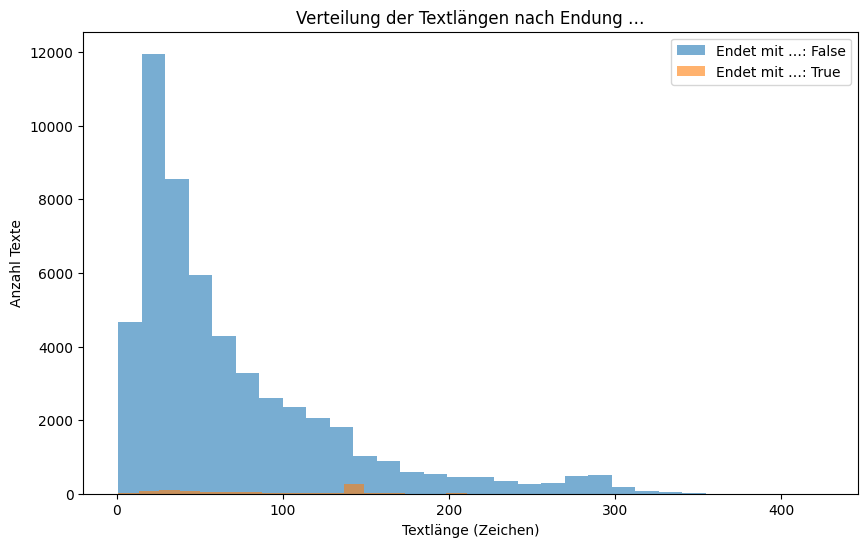

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Neue Spalte: Länge der Texte
df["text_length"] = df["fullText"].str.len()

# Neue Spalte: endet der Text mit "…"
df["ends_with_ellipsis"] = df["fullText"].str.endswith("…")

plt.figure(figsize=(10,6))

for label, group in df.groupby("ends_with_ellipsis"):
    plt.hist(group["text_length"], bins=30, alpha=0.6, label=f"Endet mit …: {label}")

plt.xlabel("Textlänge (Zeichen)")
plt.ylabel("Anzahl Texte")
plt.title("Verteilung der Textlängen nach Endung …")
plt.legend()
plt.show()

In [14]:
## Im Histogramm sieht es so aus, als gäbe es sehr viele sehr kurze Texte (unter 40 Char)
print("Kürzeste Textlänge:", df["fullText"].str.len().min())
# Die kürzesten Texte und deren Häufigkeiten
print(df["fullText"].str.len().value_counts().head(10))
# Beispiele der kürzesten Texte
print(df[df["fullText"].str.len() <= 3]["fullText"].unique()[:20])

Kürzeste Textlänge: 1
fullText
23    1197
19    1087
20    1040
17     978
21     873
18     846
16     813
25     784
27     783
26     777
Name: count, dtype: int64
['😅' 'Yup' '💯' '🤣🤣' 'X' '…' '🤯' '!!' '.' '420' 'Ω' '🤗' '💕' '🤯🤯' 'Wow'
 'Yes' 'Hmm' '🚀' '🚀🚀' '😂']


In [1]:
## Wenn der Tweet mit "RT" beginnt, handelt es sich um ein Retweet, sodass "isRetweet" "True" sein sollte.
# if text starts with("RT"): isRetweet = True
import pandas as pd
df = pd.read_csv("all_musk_posts.csv", dtype=str)

# 'isRetweet' für Tweets, die mit "RT" beginnen, setzen (nur wenn leer/NaN), damit nichts an den bereits vorhandenen Daten geändert wird.
def fix_is_retweet(row):
    val = row.get("isRetweet")
    text = row.get("fullText", "")
    if val not in ["True", "False"]:
        if isinstance(text, str) and text.startswith("RT"):
            return "True"
        else:
            return "False"
    return val

df["isRetweet"] = df.apply(fix_is_retweet, axis=1)

In [3]:
# Zeilen filtern, bei denen text mit "RT" beginnt
rt_rows = df[df["fullText"].str.startswith("RT", na=False)]
# Nur "text" und "isRetweet" anzeigen
print(rt_rows[["fullText", "isRetweet"]])

                                                fullText isRetweet
0      RT @einarvollset: I read @paulg’s  “How to Mak...      True
2      RT @BillyM2k: dude bookmarks are an awesome tw...      True
4      RT @BillyM2k: @elonmusk oh that’s actually pre...      True
5      RT @SpaceX: Watch Falcon 9 launch 54 Starlink ...      True
6            RT @Tesla: Holiday Update rolling out now 🎅      True
...                                                  ...       ...
28675  RT @SpaceX: Dragon’s first all-civilian crew h...      True
28679  RT @inspiration4x: Our #Inspiration4 crew has ...      True
28680  RT @SpaceX: Falcon 9 and Dragon in the hangar ...      True
28681  RT @netflix: On Sept 6, you’ll meet the four c...      True
28683  RT @ErcXspace: Starbase 2023.\n\n#SpaceX #Star...      True

[652 rows x 2 columns]


In [1]:
### Vorverarbeitung für CWB
import pandas as pd
df = pd.read_csv("all_musk_posts.csv", dtype=str)

# Alle NaN-Werte durch leere Strings ersetzen
df = df.fillna("")

# Zahlen-Spalten null-padden
num_cols = [
    "retweetCount", "replyCount", "likeCount",
    "quoteCount", "viewCount", "bookmarkCount"
]
for col in num_cols:
    if col in df.columns:
        # leere Strings: 0, sonst Integer umwandeln und zfill
        df[col] = df[col].apply(lambda x: str(int(float(x))) if x != "" else "0").str.zfill(6)

# Datumsspalte aufteilen
df["createdAt"] = pd.to_datetime(df["createdAt"], errors="coerce")
df["day"] = df["createdAt"].dt.day.fillna(0).astype(int).astype(str).str.zfill(2)
df["month"] = df["createdAt"].dt.month.fillna(0).astype(int).astype(str).str.zfill(2)
df["year"] = df["createdAt"].dt.year.fillna(0).astype(int).astype(str)
df["time"] = df["createdAt"].dt.time.astype(str)

# Vorverarbeitete CSV speichern
processed_csv = "all_musk_posts_preprocessed.csv"
df.to_csv(processed_csv, index=False, encoding="utf-8")

print(df[["retweetCount","replyCount","likeCount","day","month","year","time"]].head())
print(f"\nVorverarbeitung abgeschlossen. Daten in '{processed_csv}' gespeichert.")

  retweetCount replyCount likeCount day month  year      time
0       000000     000000    000000  07    05  2023  10:36:27
1       000000     000000    000000  13    05  2023  05:48:56
2       000000     000000    000000  09    02  2023  20:03:00
3       000000     000000    000000  12    05  2023  05:52:26
4       000000     000000    000000  20    01  2023  20:23:27

Vorverarbeitung abgeschlossen. Daten in 'all_musk_posts_preprocessed.csv' gespeichert.


In [2]:
import pandas as pd
df = pd.read_csv("all_musk_posts_preprocessed.csv", dtype=str)
count_without_time = df["time"].isna().sum()
print(f"Anzahl der Posts ohne Zeitangabe: {count_without_time}")

Anzahl der Posts ohne Zeitangabe: 0


In [1]:
import pandas as pd
df = pd.read_csv("all_musk_posts_preprocessed.csv", dtype=str)
print(df.columns)

Index(['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount',
       'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount',
       'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId',
       'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote',
       'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote',
       'retweet', 'day', 'month', 'year', 'time'],
      dtype='object')


In [2]:
df.tail()

,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet,day,month,year,time
54456,1863748322424402395,https://x.com/elonmusk/status/1863748322424402395,https://twitter.com/elonmusk/status/1863748322...,@alx Cool,000089,000150,001713,000005,049542,2024-12-03 00:53:21+00:00,...,False,False,NaN,NaN,NaN,NaN,03,12,2024,00:53:21
54457,1863740336331170304,https://x.com/elonmusk/status/1863740336331170304,https://twitter.com/elonmusk/status/1863740336...,@alx She is an activist posing as a judge,000342,000342,003682,000020,066865,2024-12-03 00:21:37+00:00,...,False,False,NaN,NaN,NaN,NaN,03,12,2024,00:21:37
54458,1863740028406337896,https://x.com/elonmusk/status/1863740028406337896,https://twitter.com/elonmusk/status/1863740028...,Absolutely,009675,002253,081839,000151,40855449,2024-12-03 00:20:24+00:00,...,True,False,NaN,1863737832818479385,"{'type': 'tweet', 'id': '1863737832818479385',...",NaN,03,12,2024,00:20:24
54459,1863736644773220593,https://x.com/elonmusk/status/1863736644773220593,https://twitter.com/elonmusk/status/1863736644...,@BillyM2k Absolutely,000094,000168,001812,000010,058877,2024-12-03 00:06:57+00:00,...,False,False,NaN,NaN,NaN,NaN,03,12,2024,00:06:57
54460,1863736436945555943,https://x.com/elonmusk/status/1863736436945555943,https://twitter.com/elonmusk/status/1863736436...,@DonaldJTrumpJr @TulsiGabbard Exactly,000204,000154,003224,000011,136010,2024-12-03 00:06:07+00:00,...,False,False,NaN,NaN,NaN,NaN,03,12,2024,00:06:07


In [6]:
import pandas as pd
df = pd.read_csv("all_musk_posts_preprocessed.csv", dtype=str)
if "quote" in df.columns:
    df = df.drop(columns=["quote"])
df.to_csv("all_musk_posts_preprocessed_q.csv", index=False, encoding="utf-8")

#### a_musk_quote_tweets.csv - Wie sieht die Datei aus?

In [7]:
import pandas as pd
mq = pd.read_csv("a_musk_quote_tweets.csv")
print(mq["orig_tweet_text"].iloc[5000])

"I vowed to destroy the woke mind virus."

一 Elon Musk https://t.co/1gFGOffxh3


In [8]:
mq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7147 entries, 0 to 7146
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   orig_tweet_id              7147 non-null   int64  
 1   orig_tweet_created_at      7147 non-null   object 
 2   orig_tweet_text            7147 non-null   object 
 3   orig_tweet_url             7147 non-null   object 
 4   orig_tweet_twitter_url     7147 non-null   object 
 5   orig_tweet_username        7147 non-null   object 
 6   orig_tweet_retweet_count   7147 non-null   int64  
 7   orig_tweet_reply_count     7147 non-null   int64  
 8   orig_tweet_like_count      7147 non-null   int64  
 9   orig_tweet_quote_count     7147 non-null   int64  
 10  orig_tweet_view_count      6634 non-null   float64
 11  orig_tweet_bookmark_count  7147 non-null   int64  
 12  musk_tweet_id              7147 non-null   int64  
 13  musk_quote_tweet           7147 non-null   objec

In [10]:
print(mq.columns.tolist())

['orig_tweet_id', 'orig_tweet_created_at', 'orig_tweet_text', 'orig_tweet_url', 'orig_tweet_twitter_url', 'orig_tweet_username', 'orig_tweet_retweet_count', 'orig_tweet_reply_count', 'orig_tweet_like_count', 'orig_tweet_quote_count', 'orig_tweet_view_count', 'orig_tweet_bookmark_count', 'musk_tweet_id', 'musk_quote_tweet', 'musk_quote_retweet_count', 'musk_quote_reply_count', 'musk_quote_like_count', 'musk_quote_quote_count', 'musk_quote_view_count', 'musk_quote_bookmark_count', 'musk_quote_created_at']


In [79]:
mq.shape

(7147, 21)

In [15]:
mq.head(10).T

,0,1,2,3,4,5,6,7,8,9
orig_tweet_id,1655977349530243074,1655968201422012418,1647327385342320640,1646226917387796491,1640016339011076097,1634736729159499776,1742179049005289570,1674221120495685635,1673808523497721856,1673509777819967488
orig_tweet_created_at,2023-05-09 16:45:41+00:00,2023-05-09 16:09:20+00:00,2023-04-15 19:53:49+00:00,2023-04-12 19:00:57+00:00,2023-03-26 15:42:19+00:00,2023-03-12 02:03:02+00:00,2024-01-02 13:40:28+00:00,2023-06-29 00:59:55+00:00,2023-06-27 21:40:24+00:00,2023-06-27 01:53:17+00:00
orig_tweet_text,Hot take:\n\n@Twitter can become the world's n...,If Legacy Media is going to shove bigotry porn...,Starlink provides internet to the most remote ...,National Public Radio Denies Being National Or...,Arthur C. Clarke about the future of AI. \n—21...,Splashdown of Dragon confirmed – welcome back ...,"In Q4, we produced approximately 495k vehicles...",Two new features for writers: you can now post...,Additional views from yesterday’s Ship 25 stat...,Ship 25 completes a six-engine static fire tes...
orig_tweet_url,https://x.com/GuyDealership/status/16559773495...,https://x.com/TheRabbitHole84/status/165596820...,https://x.com/teslaownersSV/status/16473273853...,https://x.com/TheBabylonBee/status/16462269173...,https://x.com/Rainmaker1973/status/16400163390...,https://x.com/SpaceX/status/1634736729159499776,https://x.com/Tesla/status/1742179049005289570,https://x.com/Write/status/1674221120495685635,https://x.com/SpaceX/status/1673808523497721856,https://x.com/SpaceX/status/1673509777819967488
orig_tweet_twitter_url,https://twitter.com/GuyDealership/status/16559...,https://twitter.com/TheRabbitHole84/status/165...,https://twitter.com/teslaownersSV/status/16473...,https://twitter.com/TheBabylonBee/status/16462...,https://twitter.com/Rainmaker1973/status/16400...,https://twitter.com/SpaceX/status/163473672915...,https://twitter.com/Tesla/status/1742179049005...,https://twitter.com/Write/status/1674221120495...,https://twitter.com/SpaceX/status/167380852349...,https://twitter.com/SpaceX/status/167350977781...
orig_tweet_username,GuyDealership,TheRabbitHole84,teslaownersSV,TheBabylonBee,Rainmaker1973,SpaceX,Tesla,Write,SpaceX,SpaceX
orig_tweet_retweet_count,632,1409,1253,4781,5409,2607,2701,898,3375,5559
orig_tweet_reply_count,497,412,800,701,737,843,1256,884,1108,1212
orig_tweet_like_count,7730,5328,8472,37752,20773,22442,18891,4545,30217,44803
orig_tweet_quote_count,123,264,175,442,814,317,673,1232,472,603


In [14]:
mq.orig_tweet_text[6]

'In Q4, we produced approximately 495k vehicles &amp; delivered over 484k vehicles.\n\nFull year 2023\nDeliveries: 1.81 million (+38% YoY)\nProduction: 1.85 million (+ 35% YoY)\n\nOur Q4 Earnings Call will be streamed live on X on January 24 at 4:30pm CT\n\n→ https://t.co/vWPOkQVGmV'

In [31]:
mq["orig_tweet_text"] = mq["orig_tweet_text"].astype(str)
# Prüfen, ob der Text mit "..." endet und somit möglicherweise unvollständig ist
mask = mq["orig_tweet_text"].str.endswith("...")
count_ellipsis = mask.sum()
print(f"Anzahl der Posts, deren fullText mit '...' endet: {count_ellipsis}")

Anzahl der Posts, deren fullText mit '...' endet: 18


Ich entscheide mich für den größeren der beiden Datensätze, da ca. 54.000 deutlich näher an der Postanzahl von Trump (87.000) sind als die 7.400 des zweiten Datensatzes. Zwar ist dieser dafür deutlich aussagekräftiger, da die jeweiligen Metadaten mit Daten gefüllt sind. Allerdings ist der zweite Datensatz deutlich weniger vergleichbar mit Trumps Datensatz als ersterer. Außerdem umfassen beide Datensätze (Trumps und Musks) dann ähnliche Zeiträume: Musk 2010-2025; Trump 2009-2025.

#### POS-Tagger - zuerst für Musks Tweets

In [7]:
## & und andere Sonderzeichen in den Metaddaten müssen escaped werden, damit sie das Script nicht stören:
import pandas as pd
df = pd.read_csv("all_musk_posts_preprocessed.csv", dtype=str)

# Prüfen, ob in "url", "twitterUrl" und "quote" ein & vorkommt
mask_url = df["url"].str.contains("&", na=False)
mask_twitter = df["twitterUrl"].str.contains("&", na=False)
mask_quote = df["quote"].str.contains("&", na=False)
# Treffer anzeigen
print("➡️ url mit &:") 
print(df.loc[mask_url, "url"].head())
print("\n➡️ twitterUrl mit &:") 
print(df.loc[mask_twitter, "twitterUrl"].head())
print("➡️ quote mit &:") 
print(df.loc[mask_quote, "quote"].head())
print("\nAnzahl in url:", mask_url.sum())
print("Anzahl in twitterUrl:", mask_twitter.sum())
print("Anzahl in quote:", mask_quote.sum())

➡️ url mit &:
Series([], Name: url, dtype: object)

➡️ twitterUrl mit &:
Series([], Name: twitterUrl, dtype: object)
➡️ quote mit &:
1210    {'type': 'tweet', 'id': '1640016339011076097',...
1315    {'type': 'tweet', 'id': '1634736729159499776',...
1345    {'type': 'tweet', 'id': '1742179049005289570',...
1406    {'type': 'tweet', 'id': '1673509777819967488',...
1658    {'type': 'tweet', 'id': '1668747661028081664',...
Name: quote, dtype: object

Anzahl in url: 0
Anzahl in twitterUrl: 0
Anzahl in quote: 3184


In [1]:
# kurzer Test
import stanza

#stanza.download("en")  
nlp = stanza.Pipeline(
    lang="en", 
    processors="tokenize,pos,lemma", 
    tokenize_pretokenized=False,
    use_gpu=False, 
    tokenize_with_spacy=False, 
    tokenize_no_ssplit=False,
    tokenize_engine="tokenize/tweet"
)

# Beispieltext
text = "If Legacy Media is going to shove bigotry porn down our throats it should at least do so in an honest manner so people have an accurate understanding of racial dynamics.\n\nTime and time again, Legacy Media has failed to do just that.\n\nH/T: @DavidRozado https://t.co/bsB6rVV7Yn"

doc = nlp(text)

for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text, word.lemma, word.upos, word.xpos)

2025-09-14 21:22:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-09-14 21:22:38 INFO: Downloaded file to /Users/vivien/stanza_resources/resources.json
2025-09-14 21:22:38 WARNING: Language en package default expects mwt, which has been added
2025-09-14 21:22:38 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-09-14 21:22:38 INFO: Using device: cpu
2025-09-14 21:22:38 INFO: Loading: tokenize
2025-09-14 21:22:41 INFO: Loading: mwt
2025-09-14 21:22:41 INFO: Loading: pos
2025-09-14 21:22:44 INFO: Loading: lemma
2025-09-14 21:22:46 INFO: Done loading processors!


If if SCONJ IN
Legacy Legacy PROPN NNP
Media Media PROPN NNP
is be AUX VBZ
going go VERB VBG
to to PART TO
shove shove VERB VB
bigotry bigotry NOUN NN
porn porn ADV RB
down down ADP IN
our our PRON PRP$
throats throat NOUN NNS
it it PRON PRP
should should AUX MD
at at ADP IN
least least ADJ JJS
do do VERB VB
so so ADV RB
in in ADP IN
an a DET DT
honest honest ADJ JJ
manner manner NOUN NN
so so SCONJ IN
people person NOUN NNS
have have VERB VBP
an a DET DT
accurate accurate ADJ JJ
understanding understanding NOUN NN
of of ADP IN
racial racial ADJ JJ
dynamics dynamic NOUN NNS
. . PUNCT .
Time time NOUN NN
and and CCONJ CC
time time NOUN NN
again again ADV RB
, , PUNCT ,
Legacy Legacy PROPN NNP
Media Media PROPN NNP
has have AUX VBZ
failed fail VERB VBN
to to PART TO
do do VERB VB
just just ADV RB
that that PRON DT
. . PUNCT .
H/T h/t NOUN NN
: : PUNCT :
@DavidRozado @DavidRozado PROPN ADD
https://t.co/bsB6rVV7Yn https://t.co/bsB6rVV7Yn PROPN ADD


In [4]:
import pandas as pd
import stanza
import re
from html import unescape
from xml.sax.saxutils import escape as xml_escape
from pathlib import Path

stanza.download("en")

# Stanza-Pipeline mit Tweet-Tokenizer
nlp = stanza.Pipeline(
    lang="en",
    processors="tokenize,pos,lemma",
    tokenize_pretokenized=False,
    use_gpu=False,
    tokenize_with_spacy=False,
    tokenize_no_ssplit=False,
    tokenize_engine="tokenize/tweet"
)

# Emoji- und Smiley-Regex
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    "]+", flags=re.UNICODE)
smiley_pattern = re.compile(r'[:;=8][\-~]?[)D]', flags=re.UNICODE)

def is_emoji_or_smiley(token):
    return bool(emoji_pattern.fullmatch(token)) or bool(smiley_pattern.fullmatch(token))

# Metadaten
metadata_cols = [
    'id', 'url', 'twitterUrl', 'retweetCount', 'replyCount',
    'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount',
    'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId',
    'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote',
    'isConversationControlled', 'possiblySensitive', 'quoteId',
    'retweet', 'day', 'month', 'year', 'time',
]

df = pd.read_csv("all_musk_posts_preprocessed_q.csv", dtype=str)
df = df.fillna("")

# Zielverzeichnis und Datei
output_dir = Path("/usr/local/share/cwb/data/musk")
output_dir.mkdir(parents=True, exist_ok=True)
vrt_file = output_dir / "musk.vrt"

# Funktion: escapen, falls problematische Zeichen vorkommen
def escape_if_needed(val):
    s = "" if val is None else str(val)
    if any(ch in s for ch in ['&', '<', '>', '"', "'"]):
        # xml_escape ersetzt &, <, >
        return xml_escape(s, {'"': '&quot;', "'": '&apos;'})
    return s

# enthalten Metadaten problematische Zeichen?
problem_chars = ['&', '<', '>', '"', "'"]
meta_problems = {}
for col in metadata_cols:
    if col in df.columns:
        mask = df[col].astype(str).apply(lambda x: any(ch in x for ch in problem_chars))
        if mask.any():
            meta_problems[col] = int(mask.sum())
if meta_problems:
    print("Hinweis: problematische Zeichen in Metadaten gefunden (Spalte: Anzahl):", meta_problems)
else:
    print("Keine problematischen Zeichen in den Metadaten gefunden.")

# in VRT-Datei schreiben
with open(vrt_file, "w", encoding="utf-8") as f:
    for idx, row in df.iterrows():
        raw_text = row.get("fullText", "") or ""
        clean_text = unescape(raw_text)
        if not isinstance(clean_text, str) or clean_text.strip() == "":
            continue
        # Metadaten: nur escapen, wenn nötig
        attr_parts = []
        for col in metadata_cols:
            val = row.get(col, "")
            attr_parts.append(f'{col}="{escape_if_needed(val)}"')
        text_attrs = " ".join(attr_parts)
        f.write(f"<text {text_attrs}>\n")
        # Tagging
        doc = nlp(clean_text)
        for sentence in doc.sentences:
            f.write("<s>\n")
            for word in sentence.words:
                xpos = word.xpos
                if is_emoji_or_smiley(word.text):
                    xpos = "NFP"
                lemma_p = f"{word.lemma}_{word.upos}"
                # Token-Zeile: nicht escapen
                token_line = "\t".join([
                    word.text,
                    word.lemma,
                    word.upos,
                    xpos,
                    lemma_p
                ])
                f.write(token_line + "\n")
            f.write("</s>\n")
        f.write("</text>\n")

print(f"VRT-Datei gespeichert: {vrt_file}")

2025-09-17 17:37:01 INFO: Downloaded file to /Users/vivien/stanza_resources/resources.json
2025-09-17 17:37:01 INFO: Downloading default packages for language: en (English) ...
2025-09-17 17:37:03 INFO: File exists: /Users/vivien/stanza_resources/en/default.zip
2025-09-17 17:37:11 INFO: Finished downloading models and saved to /Users/vivien/stanza_resources
2025-09-17 17:37:11 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-09-17 17:37:11 INFO: Downloaded file to /Users/vivien/stanza_resources/resources.json
2025-09-17 17:37:11 WARNING: Language en package default expects mwt, which has been added
2025-09-17 17:37:12 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-09-17 17:37:12 INFO: Using device: cpu
2025-09-17 17:37:12 INFO: Loading: tokenize
2025-09-17 17:37:12 INFO: Loading: mwt
2025-09-17 17:37:12 INFO: Loading: pos
2025-09-17 17:37:18 INFO: Loading: lemma
2025-09-17 17:37:20 INFO: Done loading processors!


Hinweis: problematische Zeichen in Metadaten gefunden (Spalte: Anzahl): {'retweet': 638}
VRT-Datei gespeichert: /usr/local/share/cwb/data/musk/musk.vrt


In [5]:
import pandas as pd

# Nur Token-Zeilen einlesen, Kommentare/Tags (<…>) überspringen
df = pd.read_csv(
    "musk.vrt",
    sep="\t",
    names=["lemma", "upos", "xpos", "lemma_p"],
    comment="<",         # Alles, was mit "<" beginnt, überspringen
    quoting=3,           # 3 = csv.QUOTE_NONE: keine Quotes interpretieren
    engine="python",
    on_bad_lines="skip"  # Falls mal eine kaputte Zeile drin ist, überspringen
)

print(df.tail())

      lemma   upos xpos    lemma_p
That   that   PRON   DT  that_PRON
hurts  hurt   VERB  VBZ  hurt_VERB
,         ,  PUNCT    ,    ,_PUNCT
ok       ok   INTJ   UH    ok_INTJ
?         ?  PUNCT    .    ?_PUNCT


In [6]:
df.shape

(3587, 4)

In [7]:
# Passt alles? Wie sieht die Datei aus?
vrt_file = "/usr/local/share/cwb/data/musk/musk.vrt"

with open(vrt_file, "r", encoding="utf-8") as f:
    lines = [next(f) for _ in range(50)]
    for line in lines:
        print(line.strip())

<text id="1655159652990976000" url="https://x.com/elonmusk/status/1655159652990976000" twitterUrl="https://twitter.com/elonmusk/status/1655159652990976000" retweetCount="000000" replyCount="000000" likeCount="000000" quoteCount="000000" viewCount="000000" createdAt="2023-05-07 10:36:27+00:00" bookmarkCount="000000" isReply="" inReplyToId="" conversationId="" inReplyToUserId="" inReplyToUsername="" isPinned="" isRetweet="" isQuote="" isConversationControlled="" possiblySensitive="" quoteId="" retweet="" day="07" month="05" year="2023" time="10:36:27">
<s>
RT	RT	PROPN	NNP	RT_PROPN
@einarvollset	@einarvollset	PROPN	NNP	@einarvollset_PROPN
:	:	PUNCT	:	:_PUNCT
I	I	PRON	PRP	I_PRON
read	read	VERB	VBP	read_VERB
@paulg	@paulg	PROPN	NNP	@paulg_PROPN
’s	's	PART	POS	's_PART
“	''	PUNCT	``	''_PUNCT
How	how	ADV	WRB	how_ADV
to	to	PART	TO	to_PART
Make	make	VERB	VB	make_VERB
Wealth	Wealth	PROPN	NNP	Wealth_PROPN
”	''	PUNCT	''	''_PUNCT
in	in	ADP	IN	in_ADP
Hackers	hacker	PROPN	NNPS	hacker_PROPN
&	&	CCONJ	C

#### POS Tagger für Trumps Posts

In [12]:
#neu
import pandas as pd
import stanza
import re
from html import unescape
from xml.sax.saxutils import escape as xml_escape
from pathlib import Path

# Stanza herunterladen (nur beim ersten Mal nötig)
stanza.download("en")

# Stanza-Pipeline mit Tweet-Tokenizer
nlp = stanza.Pipeline(
    lang="en",
    processors="tokenize,pos,lemma",
    tokenize_pretokenized=False,
    use_gpu=False,
    tokenize_with_spacy=False,
    tokenize_no_ssplit=False,
    tokenize_engine="tokenize/tweet"
)

# Emoji- und Smiley-Regex
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    "]+", flags=re.UNICODE)
smiley_pattern = re.compile(r'[:;=8][\-~]?[)D]', flags=re.UNICODE)

def is_emoji_or_smiley(token):
    return bool(emoji_pattern.fullmatch(token)) or bool(smiley_pattern.fullmatch(token))

# Metadaten-Spalten
metadata_cols = [
    'id', 'date', 'time', 'day', 'month', 'year', 'favorites',
    'retweets', 'isRetweet', 'isDeleted', 'device', 'isFlagged', 'platform'
]

df = pd.read_json("tta_final_clean.json", dtype=str)
df = df.fillna("")

# Zielverzeichnis und Datei
output_dir = Path("/usr/local/share/cwb/data/trump")
output_dir.mkdir(parents=True, exist_ok=True)
vrt_file = output_dir / "trump.vrt"

# Escaping-Funktion nur für Metadaten
def escape_if_needed(val):
    s = "" if val is None else str(val)
    if any(ch in s for ch in ['&', '<', '>', '"', "'"]):
        return xml_escape(s, {'"': '&quot;', "'": '&apos;'})
    return s

# VRT-Datei schreiben
with open(vrt_file, "w", encoding="utf-8") as f:
    for idx, row in df.iterrows():
        raw_text = row.get("text", "") or ""
        clean_text = unescape(raw_text)

        if not isinstance(clean_text, str) or clean_text.strip() == "":
            continue

        # Metadaten-Attribute (nur escapen wenn nötig)
        attr_parts = []
        for col in metadata_cols:
            val = row.get(col, "")
            attr_parts.append(f'{col}="{escape_if_needed(val)}"')
        text_attrs = " ".join(attr_parts)
        f.write(f"<text {text_attrs}>\n")

        # Tagging
        doc = nlp(clean_text)
        for sentence in doc.sentences:
            f.write("<s>\n")
            for word in sentence.words:
                xpos = word.xpos
                if is_emoji_or_smiley(word.text):
                    xpos = "NFP"
                lemma_p = f"{word.lemma}_{word.upos}"
                token_line = "\t".join([
                    word.text,
                    word.lemma,
                    word.upos,
                    xpos,
                    lemma_p
                ])
                f.write(token_line + "\n")
            f.write("</s>\n")
        f.write("</text>\n")

print(f"VRT-Datei gespeichert: {vrt_file}")

2025-09-19 12:40:14 INFO: Downloaded file to /Users/vivien/stanza_resources/resources.json
2025-09-19 12:40:14 INFO: Downloading default packages for language: en (English) ...
2025-09-19 12:40:17 INFO: File exists: /Users/vivien/stanza_resources/en/default.zip
2025-09-19 12:40:24 INFO: Finished downloading models and saved to /Users/vivien/stanza_resources
2025-09-19 12:40:24 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-09-19 12:40:24 INFO: Downloaded file to /Users/vivien/stanza_resources/resources.json
2025-09-19 12:40:24 WARNING: Language en package default expects mwt, which has been added
2025-09-19 12:40:26 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-09-19 12:40:26 INFO: Using device: cpu
2025-09-19 12:40:26 INFO: Loading: tokenize
2025-09-19 12:40:26 INFO: Loading: mwt
2025-09-19 12:40:26 INFO: Loading: pos
2025-09-19 12:40:33 INFO: Loading: lemma
2025-09-19 12:40:34 INFO: Done loading processors!


VRT-Datei gespeichert: /usr/local/share/cwb/data/trump/trump.vrt


In [14]:
# Prüfskript für Token-Zeilen auf XML-Escapes
bad_escapes = ["&amp;", "&lt;", "&gt;", "&quot;", "&apos;"]

file_to_check = "/usr/local/share/cwb/data/trump/trump.vrt"

with open(file_to_check, "r", encoding="utf-8") as f:
    for line_num, line in enumerate(f, start=1):
        # Nur Token-Zeilen prüfen (keine <text>, <s>, </s>, </text>)
        if not line.startswith("<") and any(bad in line for bad in bad_escapes):
            print(f"Escape in Tokenzeile gefunden (Zeile {line_num}): {line.strip()}")

Escape in Tokenzeile gefunden (Zeile 753863): https://www.oann.com/newsroom/the-fbis-ties-to-twitter/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=the-fbis-ties-to-twitter	https://www.oann.com/newsroom/the-fbis-ties-to-twitter/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=the-fbis-ties-to-twitter	PROPN	ADD	https://www.oann.com/newsroom/the-fbis-ties-to-twitter/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=the-fbis-ties-to-twitter_PROPN
Escape in Tokenzeile gefunden (Zeile 901620): https://www.oann.com/trump-hosting-save-america-rally-in-waukesha-wis/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=trump-hosting-save-america-rally-in-waukesha-wis	https://www.oann.com/trump-hosting-save-america-rally-in-waukesha-wis/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=trump-hosting-save-america-rally-in-waukesha-wis	PROPN	ADD	https://www.oann.com/trump-hosting-save-america-rally-in-waukesha-wis/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=trump-hosting-save-ame

In [16]:
## ich hatte versehentlich nan-Werte als Strings "nan" gespeichert, diese werden nun durch "" ersetzt:
from pathlib import Path
vrt_path = Path("/usr/local/share/cwb/data/trump/trump.vrt")
clean_path = vrt_path.with_name("trump_clean.vrt")
with open(vrt_path, "r", encoding="utf-8") as f_in, open(clean_path, "w", encoding="utf-8") as f_out:
    for line in f_in:
        # nur "nan" ersetzen, nicht z.B. "banana"
        cleaned_line = line.replace('"nan"', '""')
        f_out.write(cleaned_line)

print(f"✅ Fertig! Datei gespeichert unter: {clean_path}")

✅ Fertig! Datei gespeichert unter: /usr/local/share/cwb/data/trump/trump_clean.vrt
